In [2]:
import os, sys
import json
!pwd

/home/suny/EAGLE-Master/second-semester/spatial-python/Spatial-Python-2020-Homework


In [3]:
with open("./data/airlines.json", "r") as i:
    airlines = json.load(i)

print(type(airlines))

<class 'list'>


In [4]:
print(airlines[100])

{'Airport': {'Code': 'LAS', 'Name': 'Las Vegas, NV: McCarran International'}, 'Time': {'Label': '2003/09', 'Month': 9, 'Month Name': 'September', 'Year': 2003}, 'Statistics': {'# of Delays': {'Carrier': 374, 'Late Aircraft': 445, 'National Aviation System': 370, 'Security': 2, 'Weather': 18}, 'Carriers': {'Names': 'American Airlines Inc.,Alaska Airlines Inc.,JetBlue Airways,Continental Air Lines Inc.,Delta Air Lines Inc.,America West Airlines Inc.,Northwest Airlines Inc.,SkyWest Airlines Inc.,ATA Airlines d/b/a ATA,United Air Lines Inc.,US Airways Inc.,Southwest Airlines Co.', 'Total': 12}, 'Flights': {'Cancelled': 68, 'Delayed': 1207, 'Diverted': 2, 'On Time': 10628, 'Total': 11905}, 'Minutes Delayed': {'Carrier': 16643, 'Late Aircraft': 20772, 'National Aviation System': 12331, 'Security': 25, 'Total': 50816, 'Weather': 1045}}}


In [5]:
for item in airlines:
    print(type(item))
    print("  ")
    
    for key, value in item.items():
        print(key)
        print(type(key))
        print(type(value))
    break

<class 'dict'>
  
Airport
<class 'str'>
<class 'dict'>
Time
<class 'str'>
<class 'dict'>
Statistics
<class 'str'>
<class 'dict'>


In [6]:
for item in airlines: 
    for _, value in item.items():
        for key1, value1 in value.items():
            print(key1)
            print(type(value1))
    break

Code
<class 'str'>
Name
<class 'str'>
Label
<class 'str'>
Month
<class 'int'>
Month Name
<class 'str'>
Year
<class 'int'>
# of Delays
<class 'dict'>
Carriers
<class 'dict'>
Flights
<class 'dict'>
Minutes Delayed
<class 'dict'>


In [7]:
for item in airlines: 
    for _, value in item.items():
        for key1, value1 in value.items():
            print(type(value1))
            if type(value1) == dict:
                print("True")    
            else:
                print("False")
    break

<class 'str'>
False
<class 'str'>
False
<class 'str'>
False
<class 'int'>
False
<class 'str'>
False
<class 'int'>
False
<class 'dict'>
True
<class 'dict'>
True
<class 'dict'>
True
<class 'dict'>
True


In [8]:
for item in airlines: 
    for _, value in item.items():
        for key1, value1 in value.items():
            if type(value1) == dict:
                for key2, value2 in value1.items():
                    print(key2)
                    print(type(value2))
            else:
                pass
    break

Carrier
<class 'int'>
Late Aircraft
<class 'int'>
National Aviation System
<class 'int'>
Security
<class 'int'>
Weather
<class 'int'>
Names
<class 'str'>
Total
<class 'int'>
Cancelled
<class 'int'>
Delayed
<class 'int'>
Diverted
<class 'int'>
On Time
<class 'int'>
Total
<class 'int'>
Carrier
<class 'int'>
Late Aircraft
<class 'int'>
National Aviation System
<class 'int'>
Security
<class 'int'>
Total
<class 'int'>
Weather
<class 'int'>


In [9]:
import sys
print(sys.version)

3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]


4408
4408
<class 'pandas.core.frame.DataFrame'>


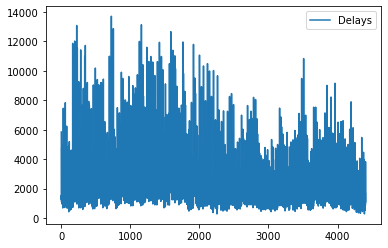

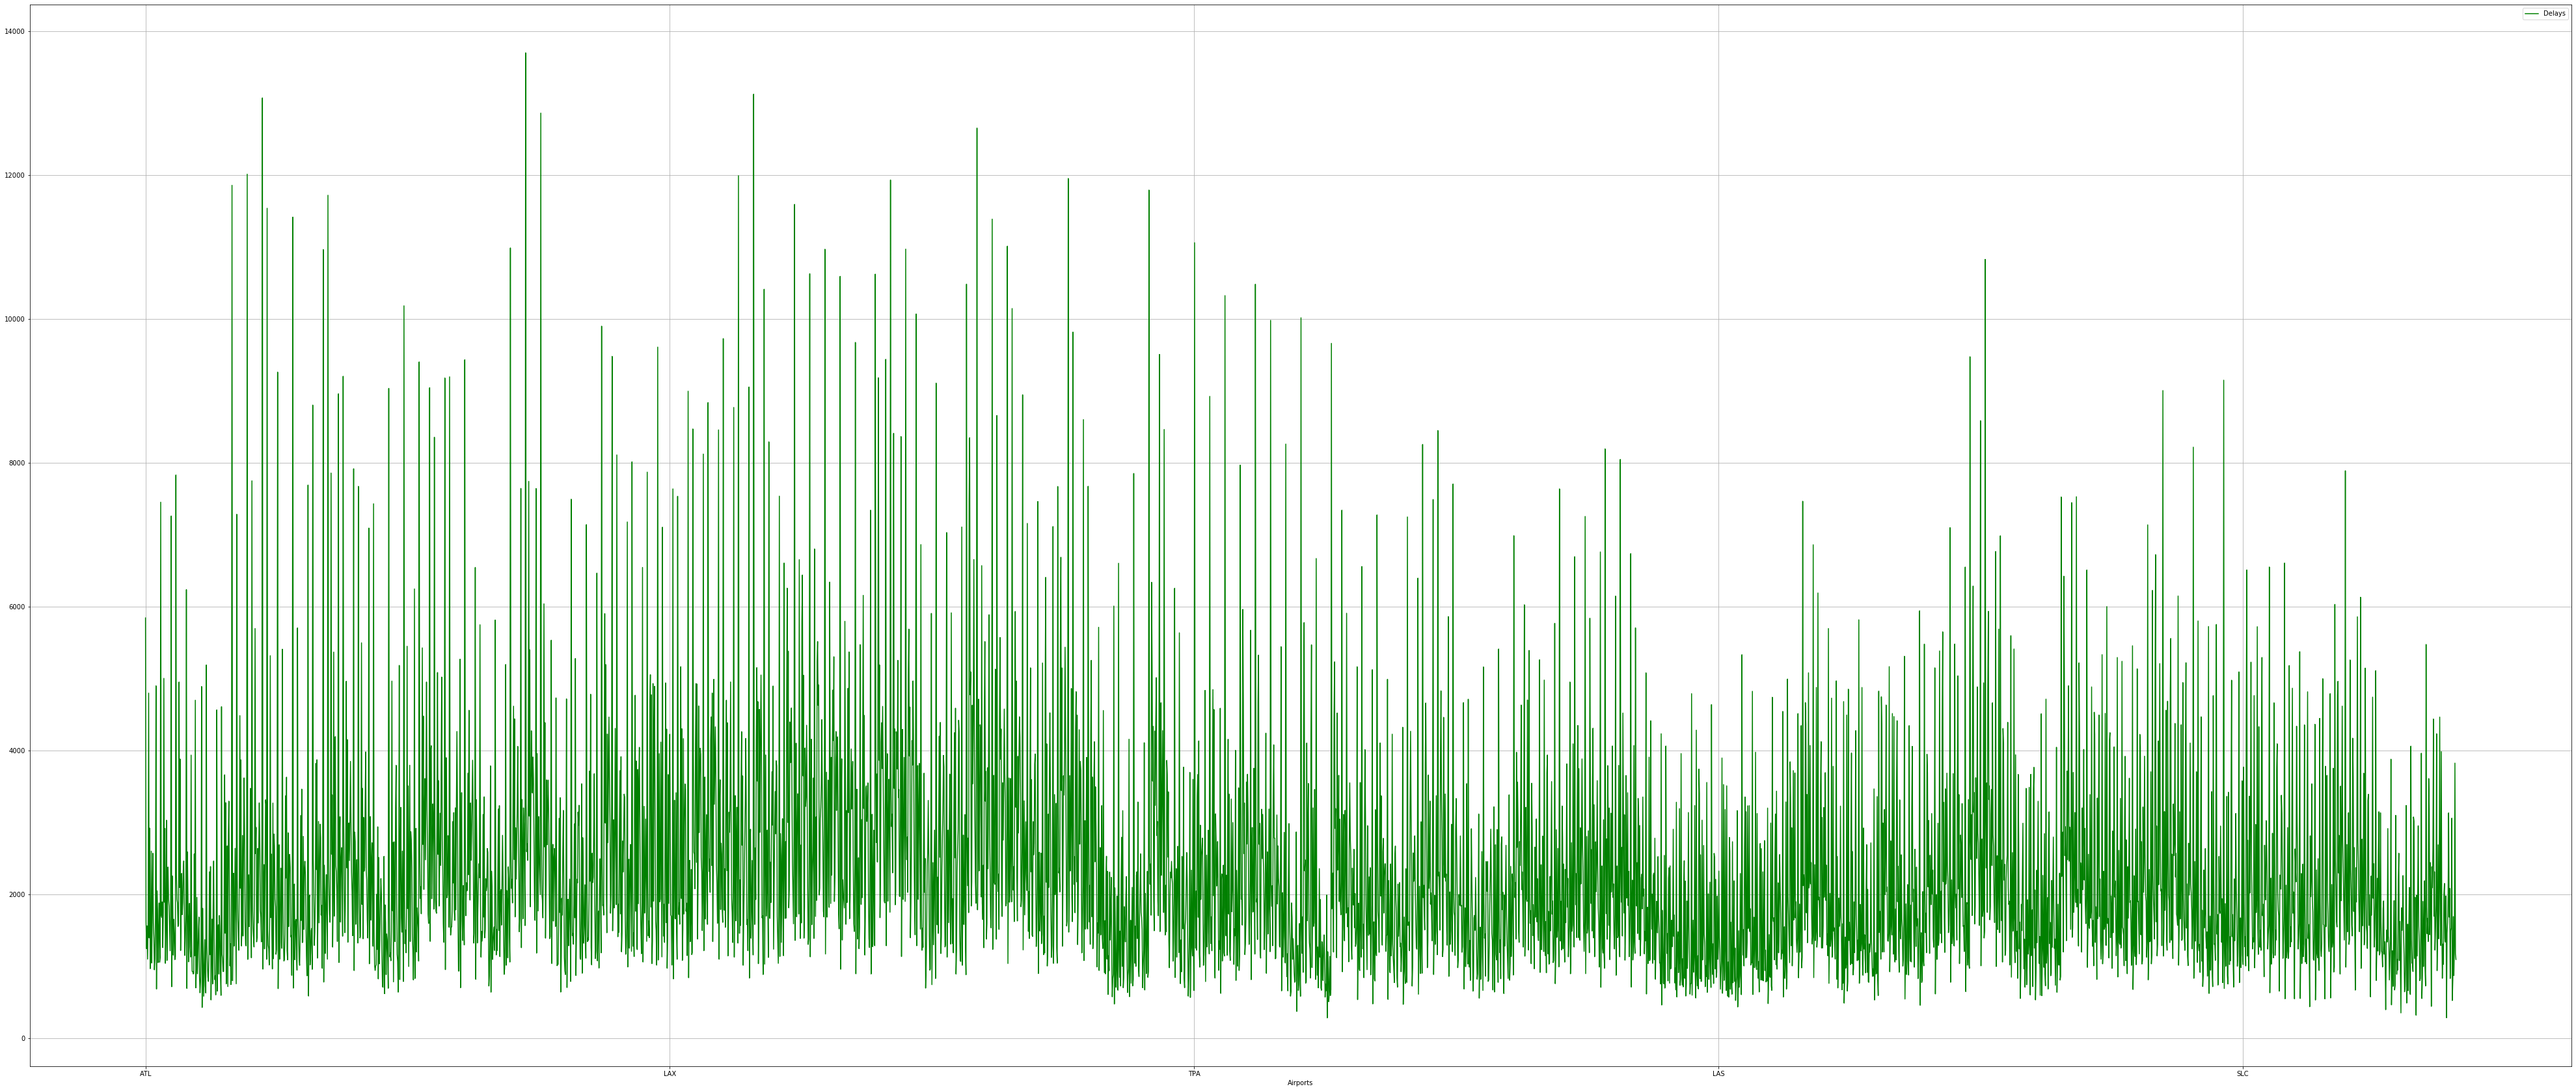

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame



airports = []

delays=[]
#print(delays)

for item in airlines: 
    for key, value in item.items():
        if key == 'Airport':
            for key1, value1 in value.items():
                if key1 == 'Code':
                    airports.append(value1)
        break
    
print(len(airports))


for item in airlines: 
    for key, value in item.items():
        if key == 'Statistics':
            for key1, value1 in value.items():
                if key1 == 'Flights':
                    for key2, value2 in value1.items():
                        if key2 == 'Delayed':
                            delays.append(value2)
                            

                            break

print(len(delays))



df = pd.DataFrame(list(zip(airports, delays)), 
               columns =['Airports', 'Delays']) 
print(type(df))



# Basic plotting
df.plot()

df.plot(x='Airports', y='Delays', figsize=(70,30), color='green' ,grid=True)

plt.savefig('delays-per-airports.pdf') 



In [15]:
#!!!!!!!The problem with this cell is that it does not show all of the airports(all of 4408)
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import tkinter as tk


df = pd.DataFrame(list(zip(airports, delays)), 
               columns =['Airports', 'Delays']) 

root= tk.Tk()
 
canvas1 = tk.Canvas(root, width = 300, height = 300)
canvas1.pack()


def export():

    with PdfPages(r'/home/suny/EAGLE-Master/second-semester/spatial-python/session-3/delay-per-airpt.pdf') as export_pdf:
      
        plt.scatter(df['Airports'], df['Delays'], color='green')
        plt.title('Delays per Airport', fontsize=3)
        plt.xlabel('Airport', fontsize=2)
        plt.ylabel('Delays', fontsize=2)
        plt.grid(True)
        export_pdf.savefig()
        plt.close()
          
  
    
button1 = tk.Button (root, text='Export PDF',command=export, bg='brown', fg='white')
canvas1.create_window(150, 150, window=button1)
    
    
root.mainloop()